In [2]:
# Importing the librarie
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the database
df = pl.read_excel(source="Volve production data.xlsx", read_csv_options={'infer_schema_length':1000})
#df_pd = pd.read_excel('Volve production data.xlsx')

In [4]:
# Displaying 4 decimals in numbers
pd.set_option('display.precision', 4)

### First glimpse

In [5]:
# head() function gets the first 5 rows for the dataframe object
df.head()

shape: (5, 24)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ DATEPRD   ┆ WELL_BORE ┆ NPD_WELL_ ┆ NPD_WELL_ ┆ … ┆ BORE_WAT_ ┆ BORE_WI_V ┆ FLOW_KIND ┆ WELL_TYP │
│ ---       ┆ _CODE     ┆ BORE_CODE ┆ BORE_NAME ┆   ┆ VOL       ┆ OL        ┆ ---       ┆ E        │
│ str       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ str       ┆ ---      │
│           ┆ str       ┆ i64       ┆ str       ┆   ┆ f64       ┆ str       ┆           ┆ str      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 07-Apr-14 ┆ NO        ┆ 7405      ┆ 15/9-F-1  ┆ … ┆ 0.0       ┆ null      ┆ productio ┆ WI       │
│           ┆ 15/9-F-1  ┆           ┆ C         ┆   ┆           ┆           ┆ n         ┆          │
│           ┆ C         ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 08-Apr-14 ┆ NO        ┆ 7405      ┆ 15/9-F-1  ┆ … ┆ 0.0       ┆ null      ┆ productio ┆ OP       │
│           ┆ 15/9-F-1  ┆           ┆ C         ┆   ┆           ┆           ┆ n         ┆          │
│           ┆ C         ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 09-Apr-14 ┆ NO        ┆ 7405      ┆ 15/9-F-1  ┆ … ┆ 0.0       ┆ null      ┆ productio ┆ OP       │
│           ┆ 15/9-F-1  ┆           ┆ C         ┆   ┆           ┆           ┆ n         ┆          │
│           ┆ C         ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 10-Apr-14 ┆ NO        ┆ 7405      ┆ 15/9-F-1  ┆ … ┆ 0.0       ┆ null      ┆ productio ┆ OP       │
│           ┆ 15/9-F-1  ┆           ┆ C         ┆   ┆           ┆           ┆ n         ┆          │
│           ┆ C         ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 11-Apr-14 ┆ NO        ┆ 7405      ┆ 15/9-F-1  ┆ … ┆ 0.0       ┆ null      ┆ productio ┆ OP       │
│           ┆ 15/9-F-1  ┆           ┆ C         ┆   ┆           ┆           ┆ n         ┆          │
│           ┆ C         ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [6]:
# Changing "DATEPRD" to datetime object
from datetime import datetime

df = df.with_columns(pl.col('DATEPRD').map_elements(lambda x:datetime.strptime(x, '%d-%b-%y').date()))

In [7]:
# tail() function gets the first 5 rows for the dataframe object 
df.tail()

shape: (5, 24)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ DATEPRD   ┆ WELL_BORE ┆ NPD_WELL_ ┆ NPD_WELL_ ┆ … ┆ BORE_WAT_ ┆ BORE_WI_V ┆ FLOW_KIND ┆ WELL_TYP │
│ ---       ┆ _CODE     ┆ BORE_CODE ┆ BORE_NAME ┆   ┆ VOL       ┆ OL        ┆ ---       ┆ E        │
│ date      ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ str       ┆ ---      │
│           ┆ str       ┆ i64       ┆ str       ┆   ┆ f64       ┆ str       ┆           ┆ str      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 2016-09-1 ┆ NO        ┆ 5769      ┆ 15/9-F-5  ┆ … ┆ 0.0       ┆ null      ┆ productio ┆ OP       │
│ 4         ┆ 15/9-F-5  ┆           ┆           ┆   ┆           ┆           ┆ n         ┆          │
│           ┆ AH        ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2016-09-1 ┆ NO        ┆ 5769      ┆ 15/9-F-5  ┆ … ┆ 0.0       ┆ null      ┆ productio ┆ OP       │
│ 5         ┆ 15/9-F-5  ┆           ┆           ┆   ┆           ┆           ┆ n         ┆          │
│           ┆ AH        ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2016-09-1 ┆ NO        ┆ 5769      ┆ 15/9-F-5  ┆ … ┆ 0.0       ┆ null      ┆ productio ┆ OP       │
│ 6         ┆ 15/9-F-5  ┆           ┆           ┆   ┆           ┆           ┆ n         ┆          │
│           ┆ AH        ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2016-09-1 ┆ NO        ┆ 5769      ┆ 15/9-F-5  ┆ … ┆ 0.0       ┆ null      ┆ productio ┆ OP       │
│ 7         ┆ 15/9-F-5  ┆           ┆           ┆   ┆           ┆           ┆ n         ┆          │
│           ┆ AH        ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2016-09-1 ┆ NO        ┆ 5769      ┆ 15/9-F-5  ┆ … ┆ null      ┆ 0         ┆ injection ┆ WI       │
│ 8         ┆ 15/9-F-5  ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│           ┆ AH        ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [8]:
# Return a tuple representing the dimensionality of the dataframe
df.shape

(15634, 24)

## Production wells

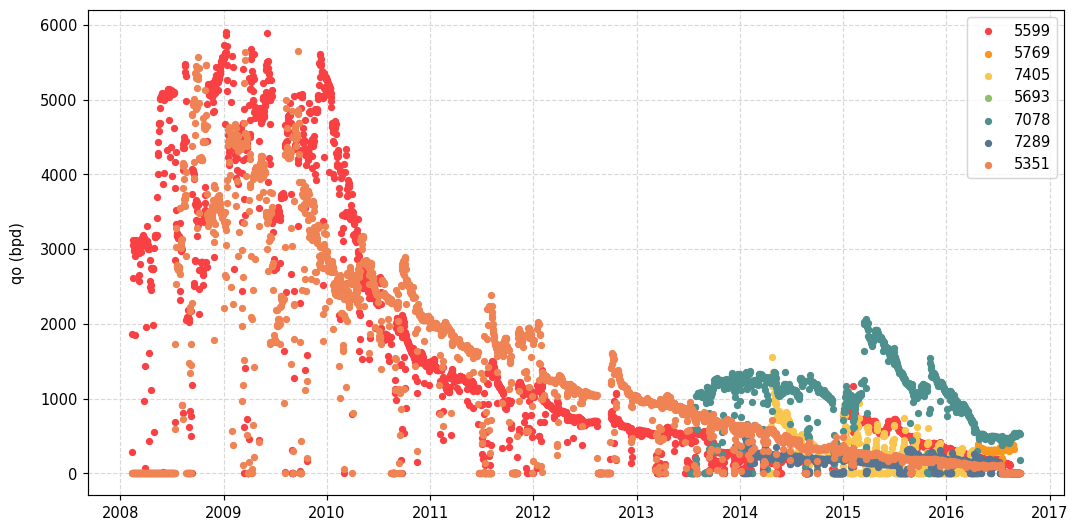

In [9]:
# Plotting the oil production rate
plt.figure(figsize=(12, 6), dpi=105)
plt.rc('axes', axisbelow=True)
# plt.rcParams['axes.axisbelow'] = True

wbr_list = df['NPD_WELL_BORE_CODE'].value_counts()[:,0].to_list()
colors = ['#f94144', '#f8961e', '#f9c74f', '#90be6d', '#4d908e', '#577590', '#ef8354']

for value in range(len(wbr_list)):
    data = df.filter(pl.col('NPD_WELL_BORE_CODE') == wbr_list[value])
    plt.scatter(data['DATEPRD'], data['BORE_OIL_VOL'], s=16, c=colors[value] , label=wbr_list[value])
    #plt.plot(data['DATEPRD'], data['BORE_OIL_VOL'], marker='o', markersize=4, c=colors[value] , label=wbr_list[value])

plt.legend()
plt.ylabel('qo (bpd)', labelpad=10)
plt.grid(c=(0.85, 0.85, 0.85), linestyle='dashed')
plt.show()

## Injection wells

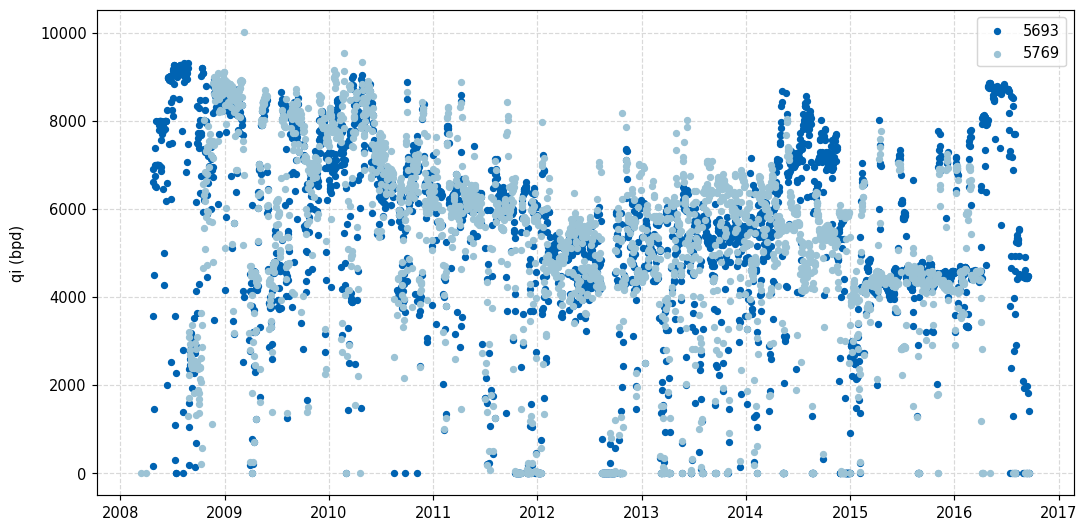

In [10]:
# Plotting the oil production rate
plt.figure(figsize=(12, 6), dpi=105)
plt.rc('axes', axisbelow=True)
# plt.rcParams['axes.axisbelow'] = True

inj_wells = [5693, 5769]
colors = ['#0063B2', '#9CC3D5']

for value in range(len(inj_wells)):
    data = df.filter(pl.col('NPD_WELL_BORE_CODE') == inj_wells[value])
    data = data.filter(pl.col('BORE_WI_VOL').is_not_null())
    data = data.select(pl.col('DATEPRD'), pl.col('BORE_WI_VOL').cast(pl.Float64))
    plt.scatter(data['DATEPRD'], data['BORE_WI_VOL'], s=16, c= colors[value], label= inj_wells[value] )
    #plt.plot(data['DATEPRD'], data['BORE_WI_VOL'], marker='o', markersize=4, c=colors[value] , label= inj_wells[value])

plt.legend()
plt.ylabel('qi (bpd)', labelpad=10)
plt.grid(c=(0.85, 0.85, 0.85), linestyle='dashed')
plt.show()

In [11]:
# Attribute that provides acces to the column labels of the dataframe
df.columns

['DATEPRD',
 'WELL_BORE_CODE',
 'NPD_WELL_BORE_CODE',
 'NPD_WELL_BORE_NAME',
 'NPD_FIELD_CODE',
 'NPD_FIELD_NAME',
 'NPD_FACILITY_CODE',
 'NPD_FACILITY_NAME',
 'ON_STREAM_HRS',
 'AVG_DOWNHOLE_PRESSURE',
 'AVG_DOWNHOLE_TEMPERATURE',
 'AVG_DP_TUBING',
 'AVG_ANNULUS_PRESS',
 'AVG_CHOKE_SIZE_P',
 'AVG_CHOKE_UOM',
 'AVG_WHP_P',
 'AVG_WHT_P',
 'DP_CHOKE_SIZE',
 'BORE_OIL_VOL',
 'BORE_GAS_VOL',
 'BORE_WAT_VOL',
 'BORE_WI_VOL',
 'FLOW_KIND',
 'WELL_TYPE']

In [12]:
# Returns a series with the datatype of each column
df.schema

OrderedDict([('DATEPRD', Date),
             ('WELL_BORE_CODE', String),
             ('NPD_WELL_BORE_CODE', Int64),
             ('NPD_WELL_BORE_NAME', String),
             ('NPD_FIELD_CODE', Int64),
             ('NPD_FIELD_NAME', String),
             ('NPD_FACILITY_CODE', Int64),
             ('NPD_FACILITY_NAME', String),
             ('ON_STREAM_HRS', Float64),
             ('AVG_DOWNHOLE_PRESSURE', Float64),
             ('AVG_DOWNHOLE_TEMPERATURE', Float64),
             ('AVG_DP_TUBING', Float64),
             ('AVG_ANNULUS_PRESS', Float64),
             ('AVG_CHOKE_SIZE_P', Float64),
             ('AVG_CHOKE_UOM', String),
             ('AVG_WHP_P', Float64),
             ('AVG_WHT_P', Float64),
             ('DP_CHOKE_SIZE', Float64),
             ('BORE_OIL_VOL', Float64),
             ('BORE_GAS_VOL', Float64),
             ('BORE_WAT_VOL', Float64),
             ('BORE_WI_VOL', String),
             ('FLOW_KIND', String),
             ('WELL_TYPE', String)])

In [13]:
# Returns the null values for each column
df.null_count()

shape: (1, 24)
┌─────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ DATEPRD ┆ WELL_BORE_ ┆ NPD_WELL_ ┆ NPD_WELL_ ┆ … ┆ BORE_WAT_ ┆ BORE_WI_V ┆ FLOW_KIND ┆ WELL_TYPE │
│ ---     ┆ CODE       ┆ BORE_CODE ┆ BORE_NAME ┆   ┆ VOL       ┆ OL        ┆ ---       ┆ ---       │
│ u32     ┆ ---        ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ u32       ┆ u32       │
│         ┆ u32        ┆ u32       ┆ u32       ┆   ┆ u32       ┆ u32       ┆           ┆           │
╞═════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0       ┆ 0          ┆ 0         ┆ 0         ┆ … ┆ 6473      ┆ 9928      ┆ 0         ┆ 0         │
└─────────┴────────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

In [14]:
# Converting the polars dataframe into a pandas dataframe
df_pd = df.to_pandas()
type(df_pd)

pandas.core.frame.DataFrame

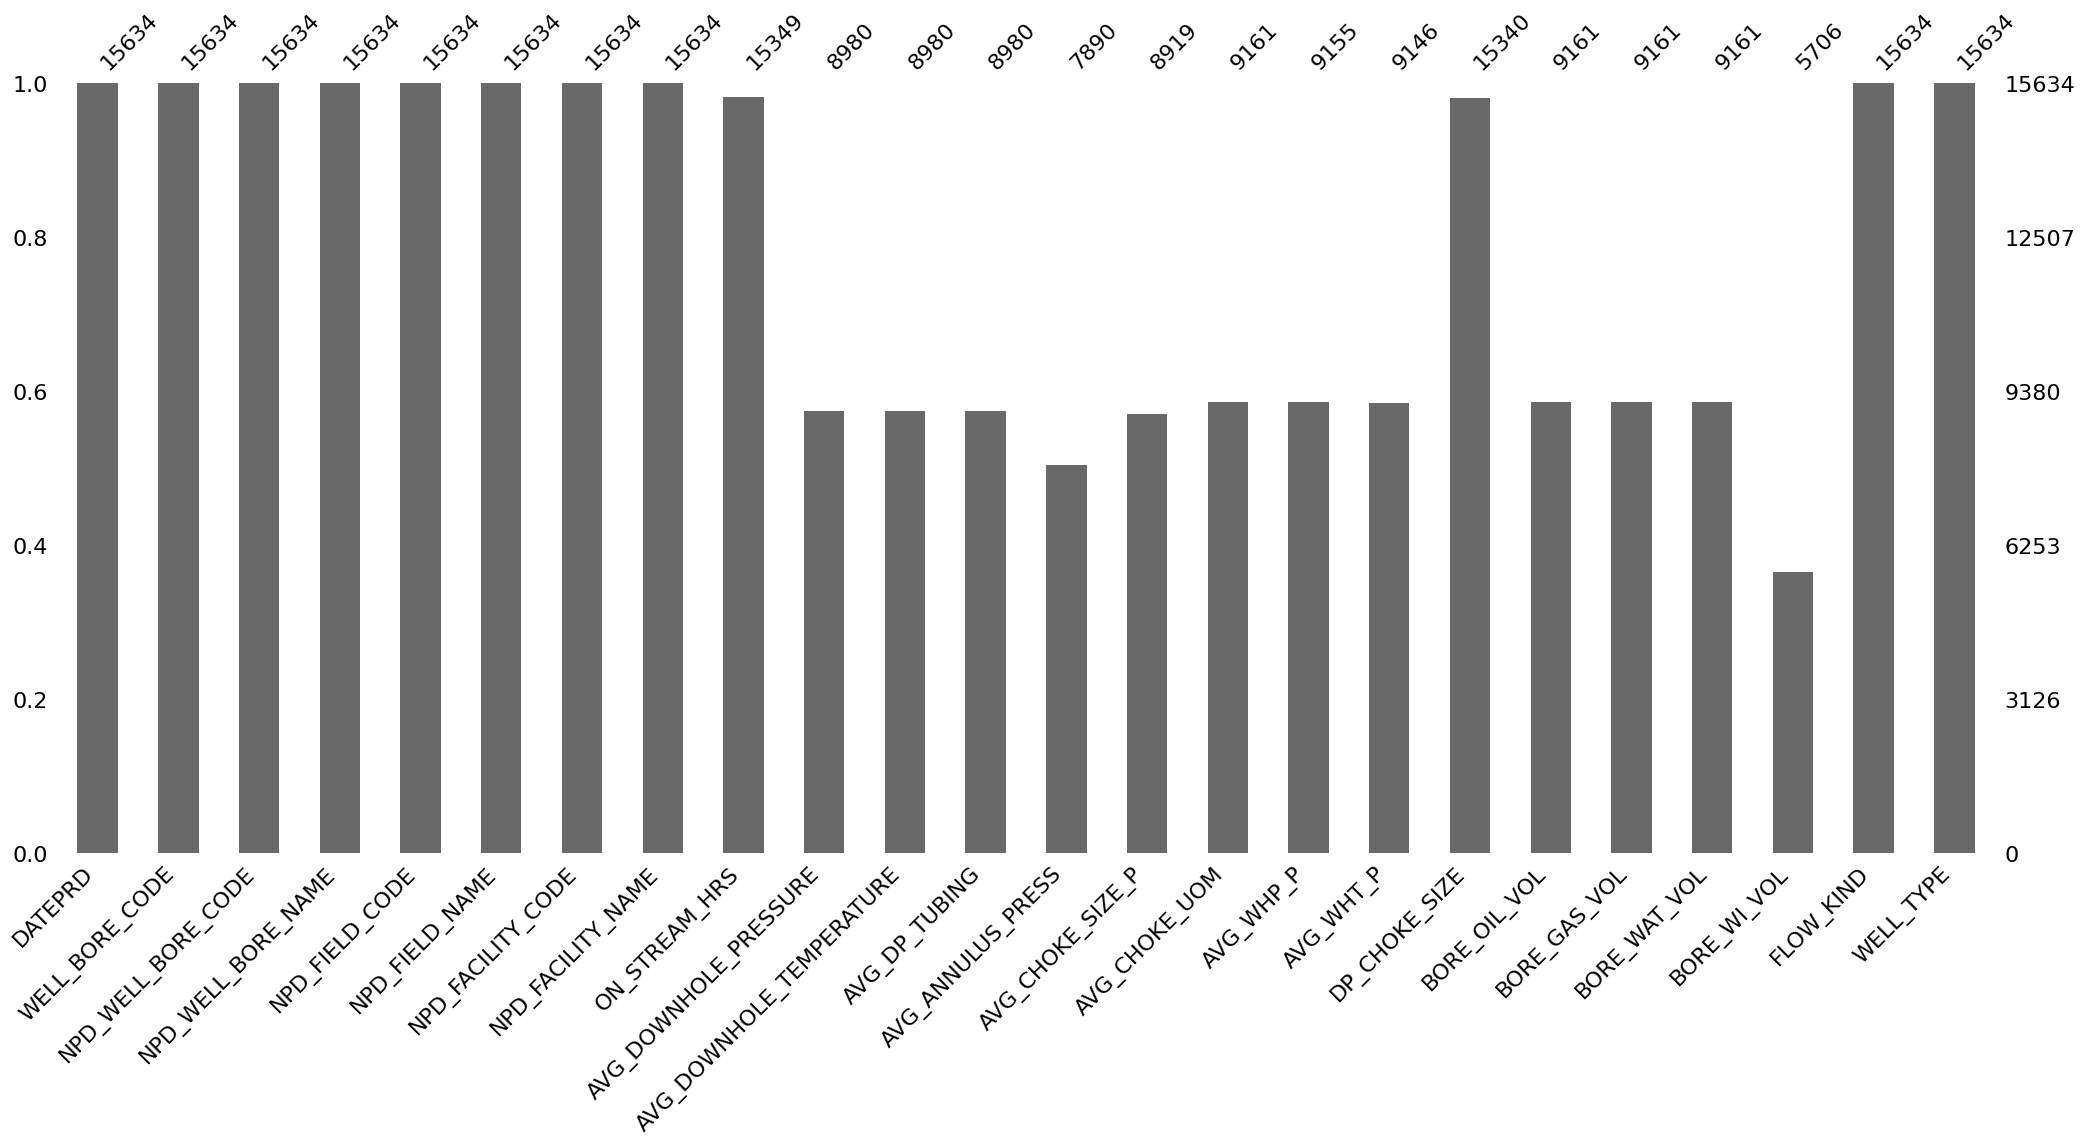

In [15]:
# Bar plot for missing values (Polars do not support the missingno library yet)
import missingno as msno

msno.bar(df_pd)
plt.show()

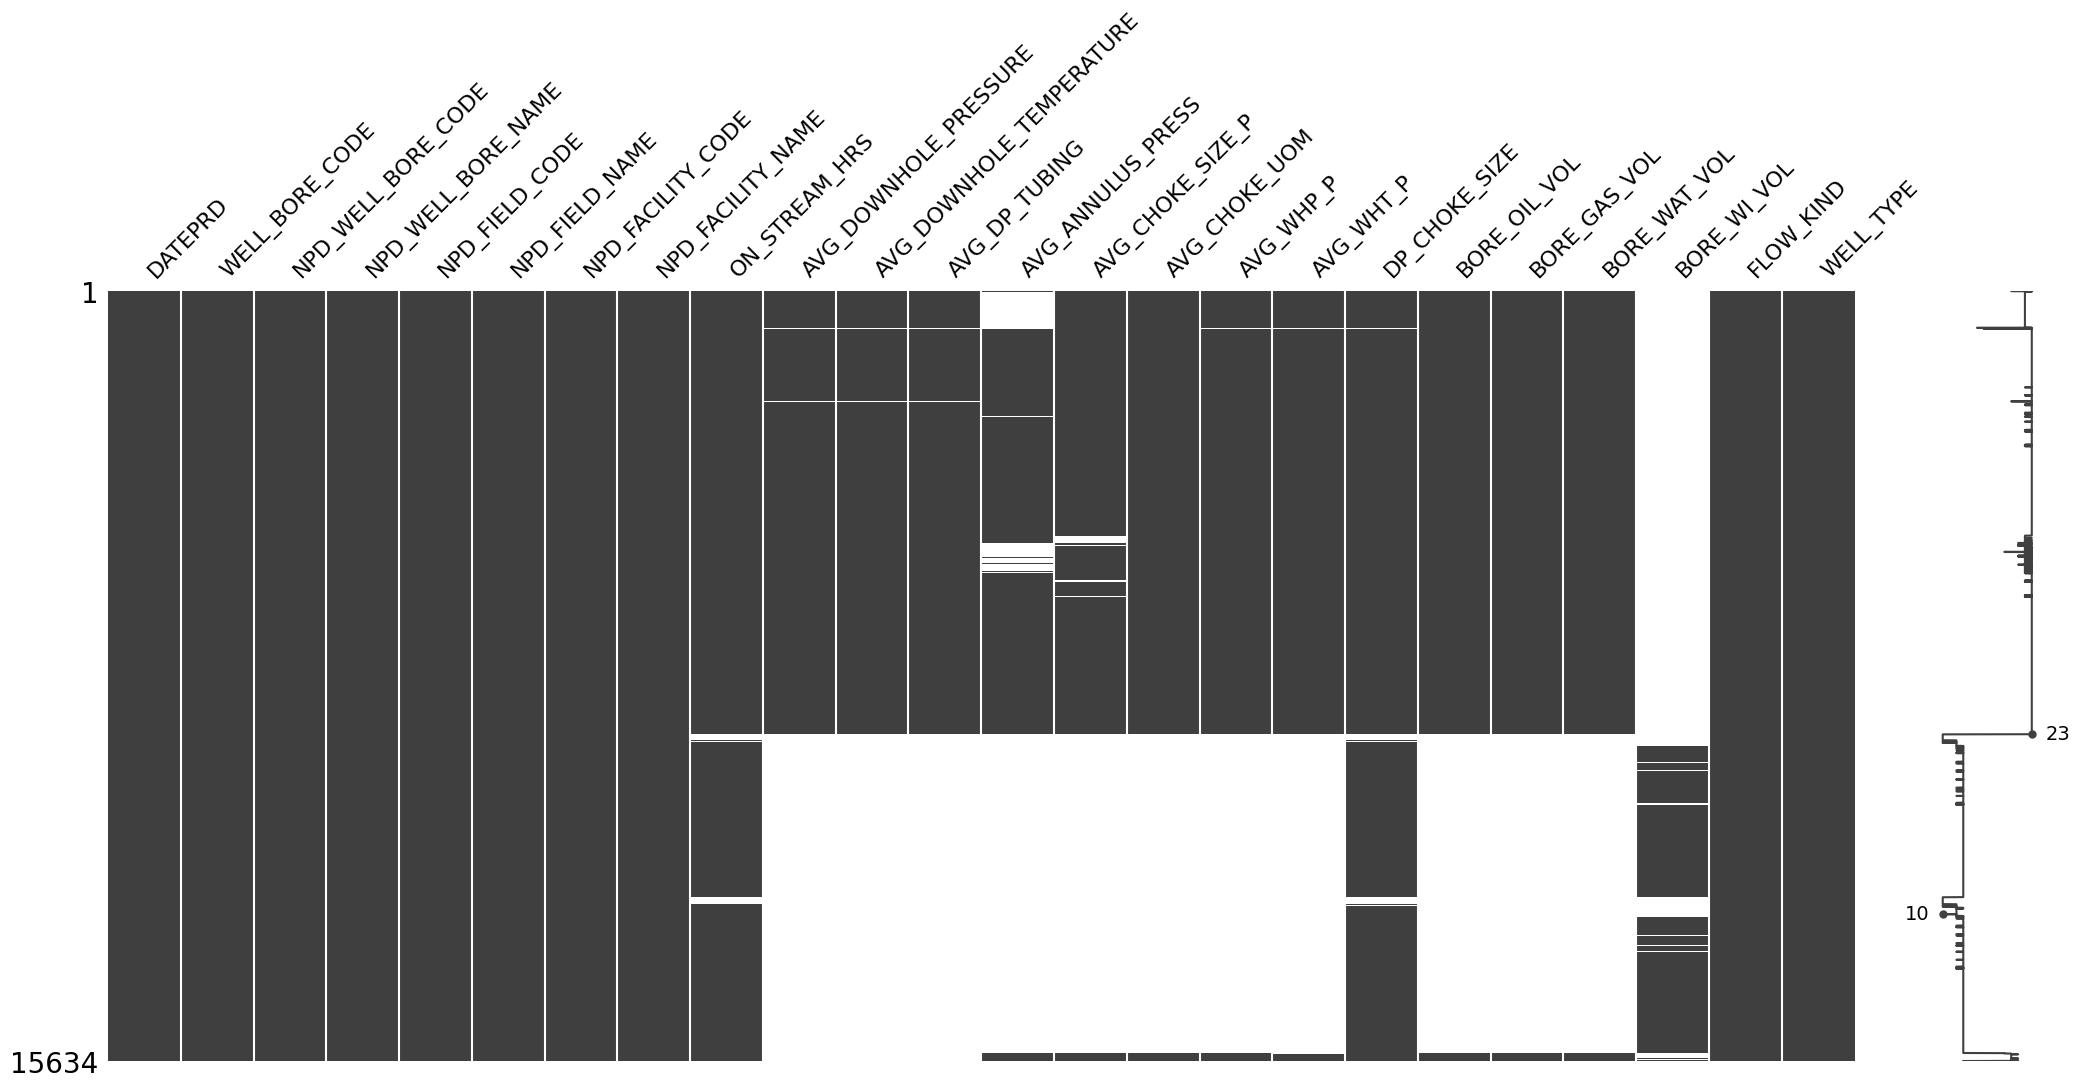

In [16]:
# Nullity Matrix plot for missing values
msno.matrix(df_pd)
plt.show()

In [1]:
# Pairplot graph (Sns do not support polars DataDrame yet)
#sns.pairplot(df_pd)
#plt.show()

### Data cleansing

In [18]:
# Delete injection wells
df_prod = df_pd.drop(['WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'AVG_CHOKE_UOM',
       'BORE_WI_VOL', 'WELL_TYPE'], axis=1)

df_prod = df_prod[df_prod['FLOW_KIND'] == 'production']
df_prod.head(3)

DATEPRD  NPD_WELL_BORE_CODE  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
0 2014-04-07                7405            0.0                    0.0   
1 2014-04-08                7405            0.0                    NaN   
2 2014-04-09                7405            0.0                    NaN   

   AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS  \
0                       0.0            0.0                0.0   
1                       NaN            NaN                0.0   
2                       NaN            NaN                0.0   

   AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  \
0            0.0000        0.0        0.0            0.0           0.0   
1            1.0031        0.0        0.0            0.0           0.0   
2            0.9790        0.0        0.0            0.0           0.0   

   BORE_GAS_VOL  BORE_WAT_VOL   FLOW_KIND  
0           0.0           0.0  production  
1           0.0           0.0  production  
2           0.0           0.0  production

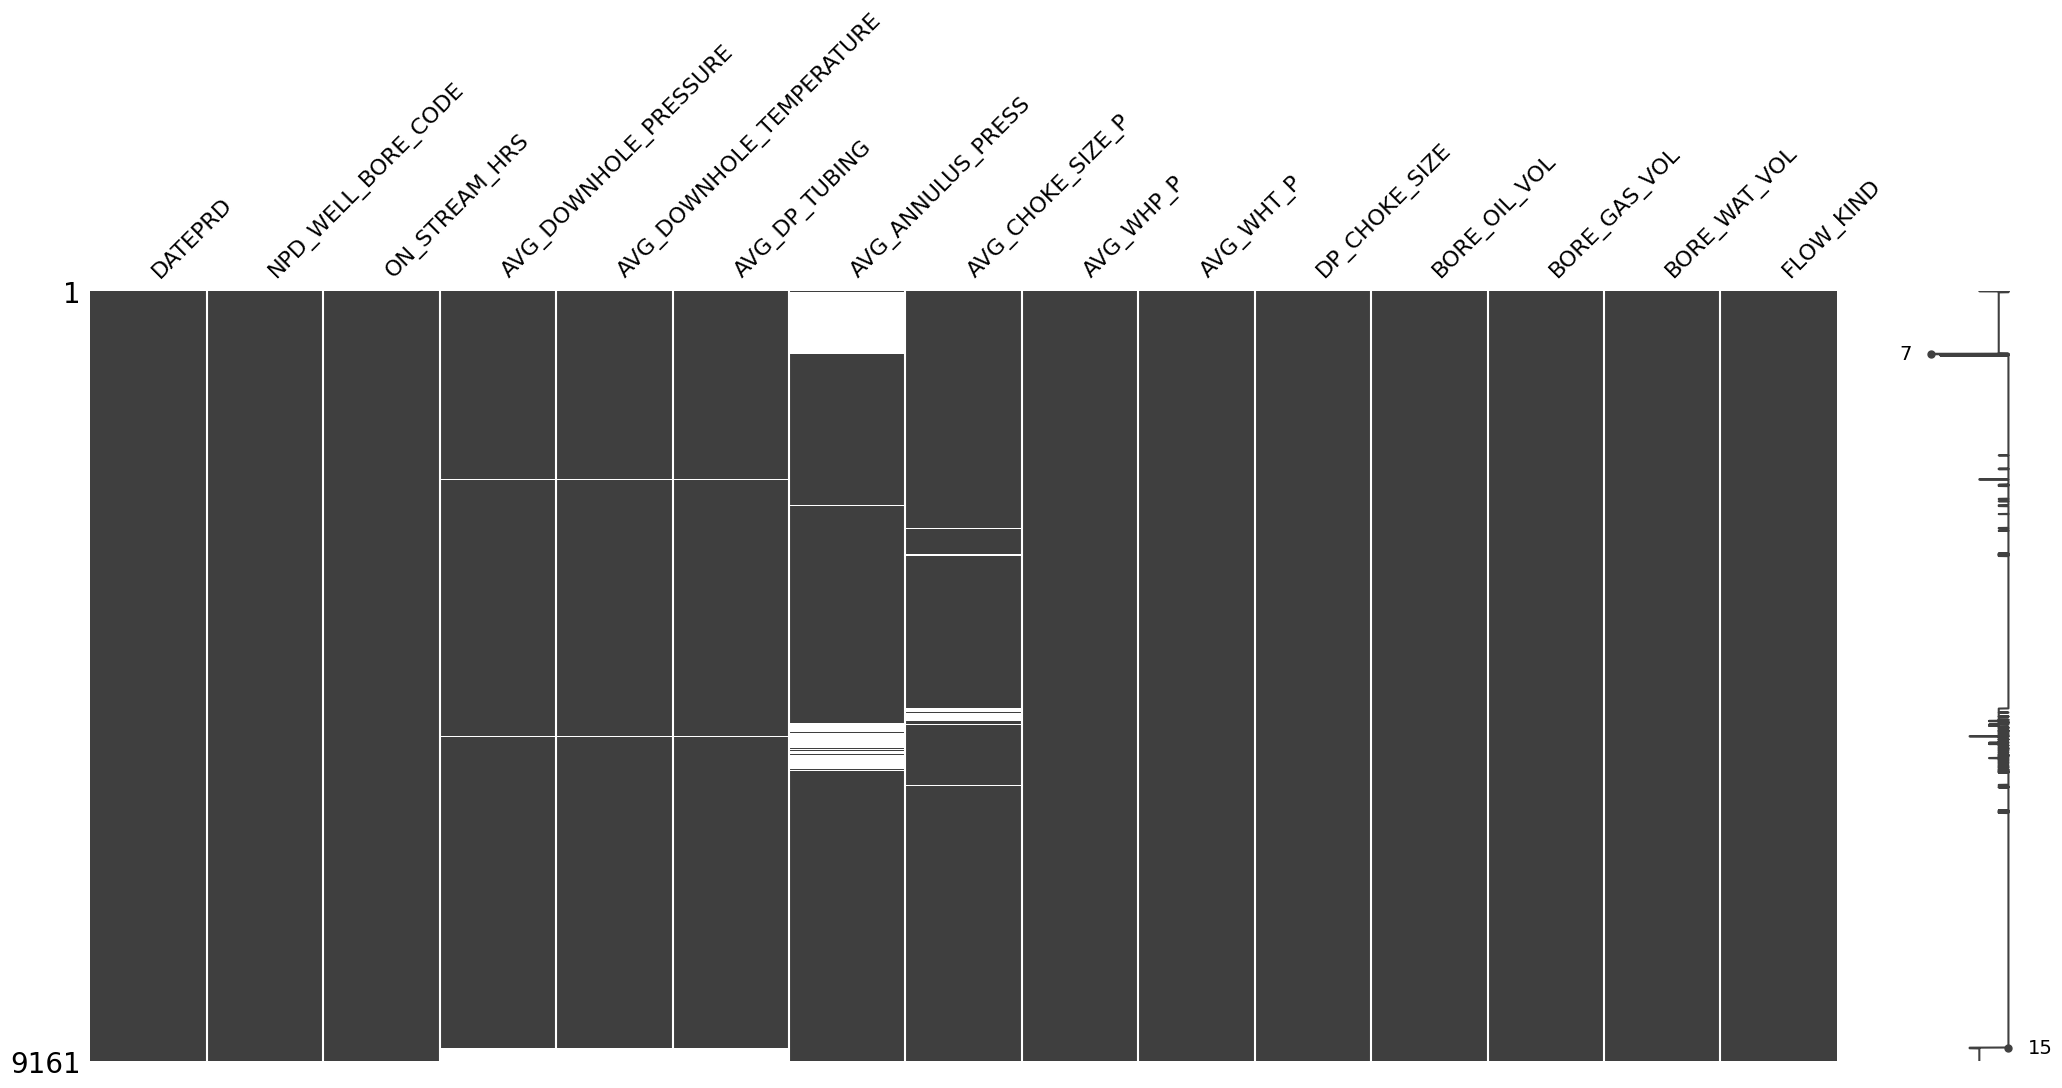

In [19]:
msno.matrix(df_prod)
plt.show()

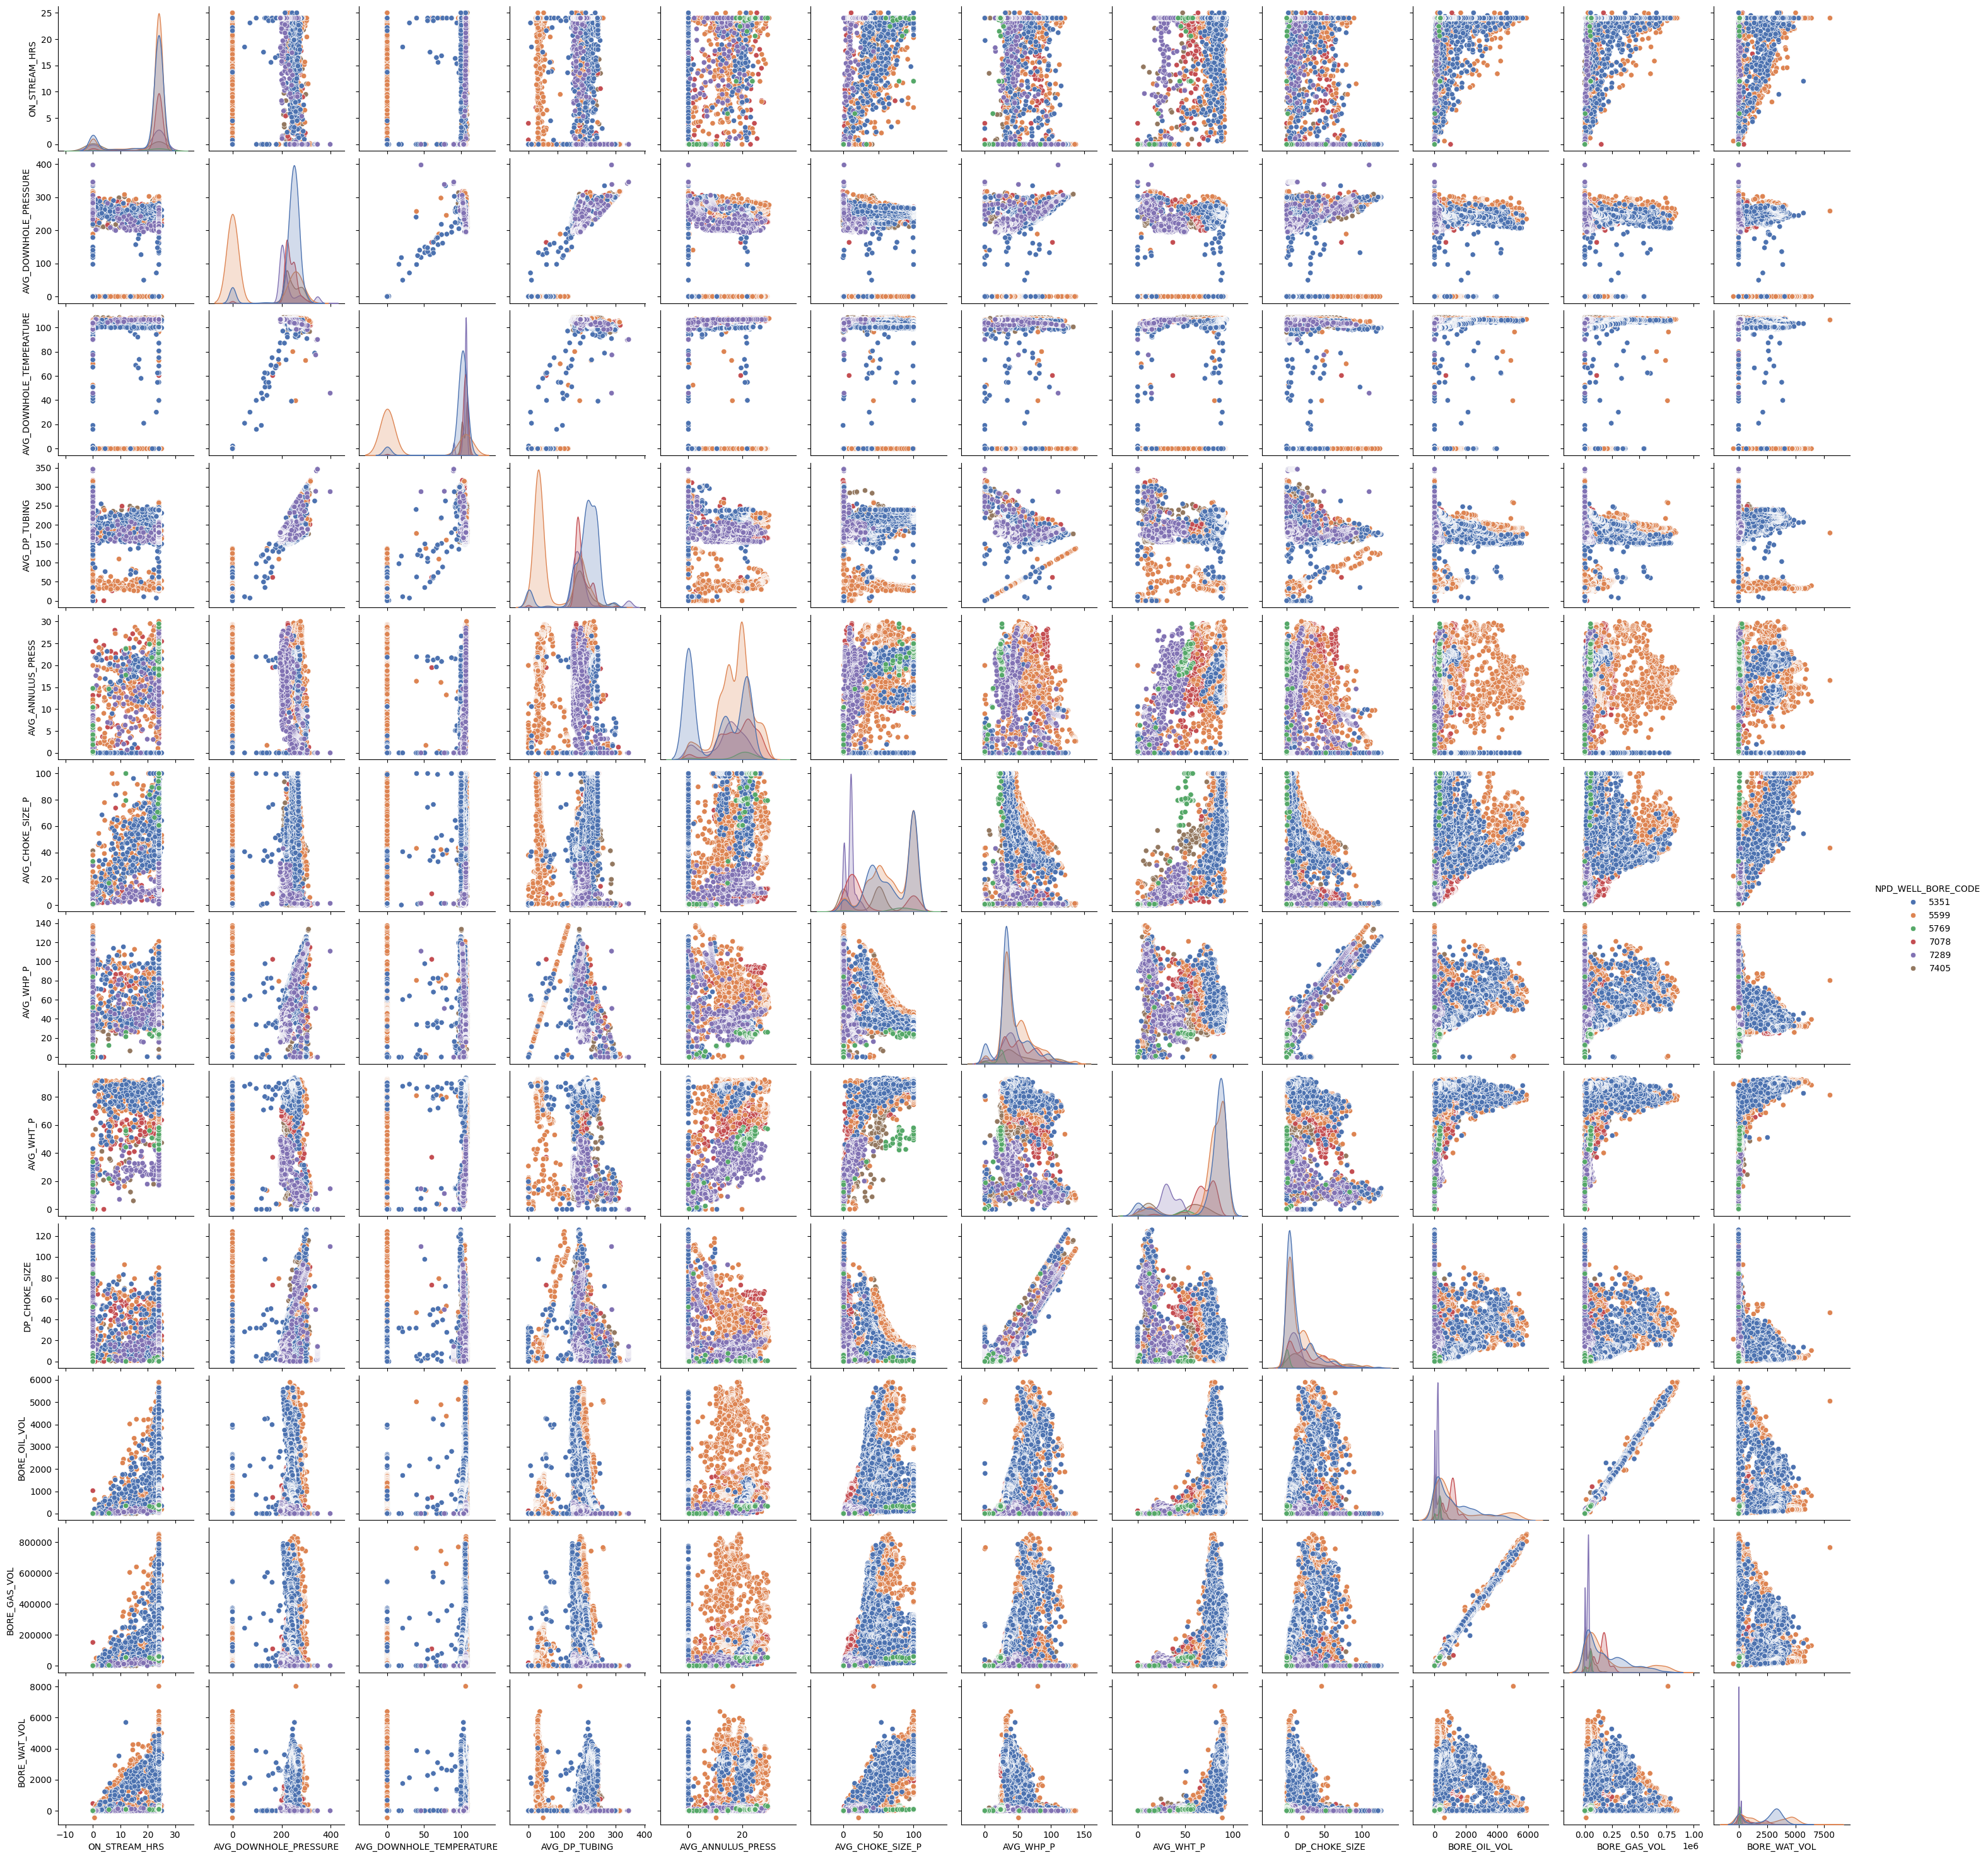

In [20]:
# Finding correlations between features
sns.pairplot(df_prod, hue='NPD_WELL_BORE_CODE', palette='deep')
plt.show()

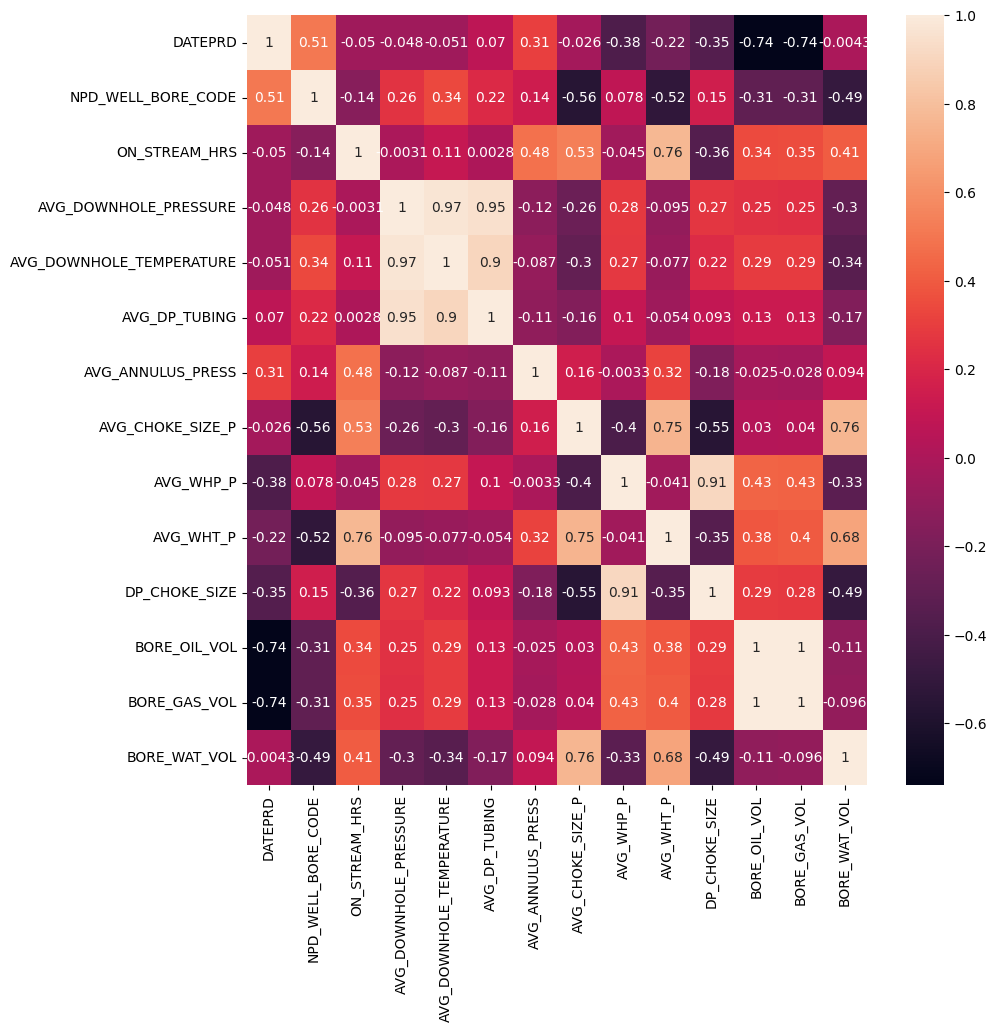

In [21]:
# Building a heatmap
fig, ax_1 = plt.subplots(figsize=(10, 10))

df_prod_c = df_prod.drop(['FLOW_KIND'], axis = 1)
df_corr_prod = df_prod_c.corr()
ax_1 = sns.heatmap(df_corr_prod, annot=True)

In [22]:
# Feature "AVG_ANNULUS_PRESS" has a -0.025 correlation with "BORE_OIL_VOL", so we decide to delete it.
df_prod = df_prod.drop(['AVG_ANNULUS_PRESS'], axis=1)

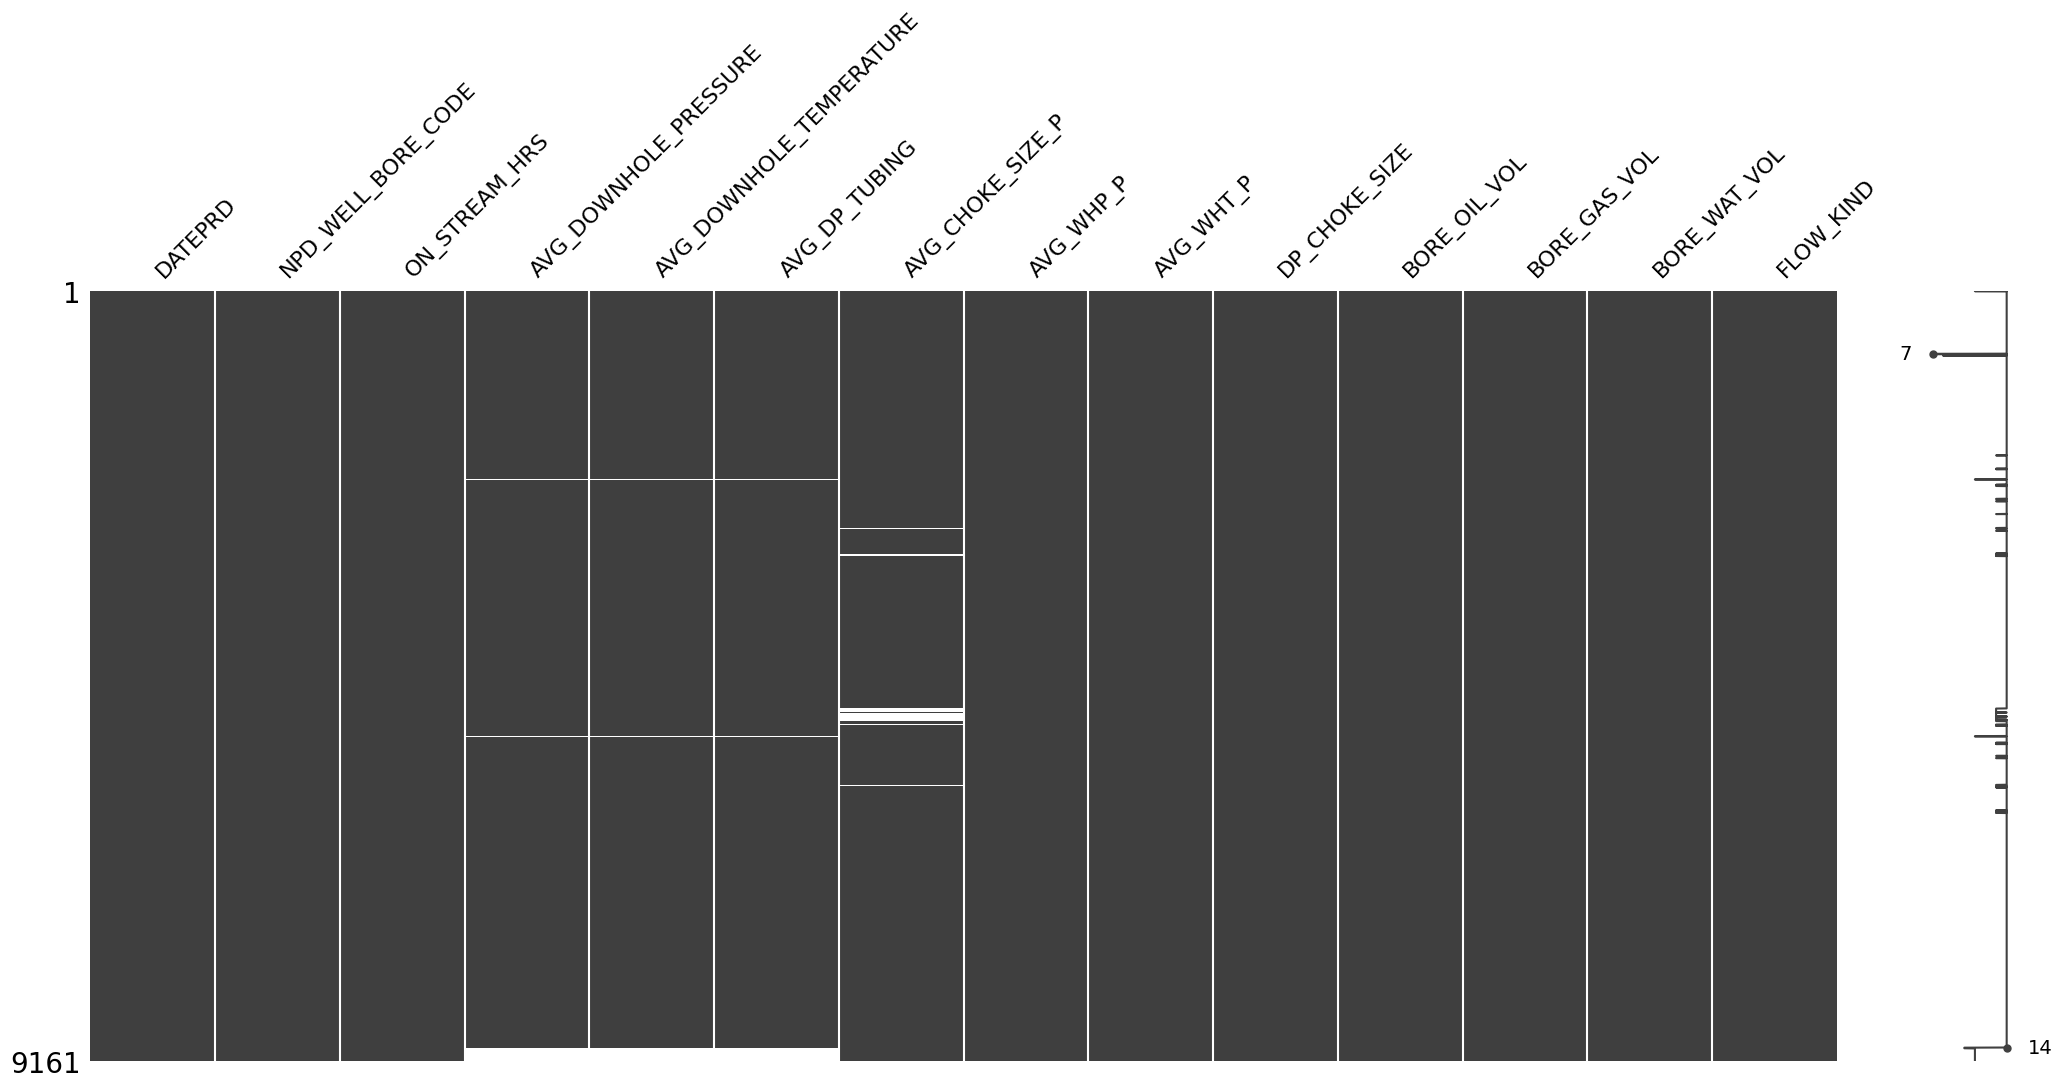

In [23]:
msno.matrix(df_prod)
plt.show()

In [24]:
# Delete 0 value rows from columns "AVG_DOWNHOLE_PRESSUE", "AVG_DOWNHOLE_TEMPERATURE", "AVG_CHOKE_SIZE_P".
df_prod = df_prod.dropna()

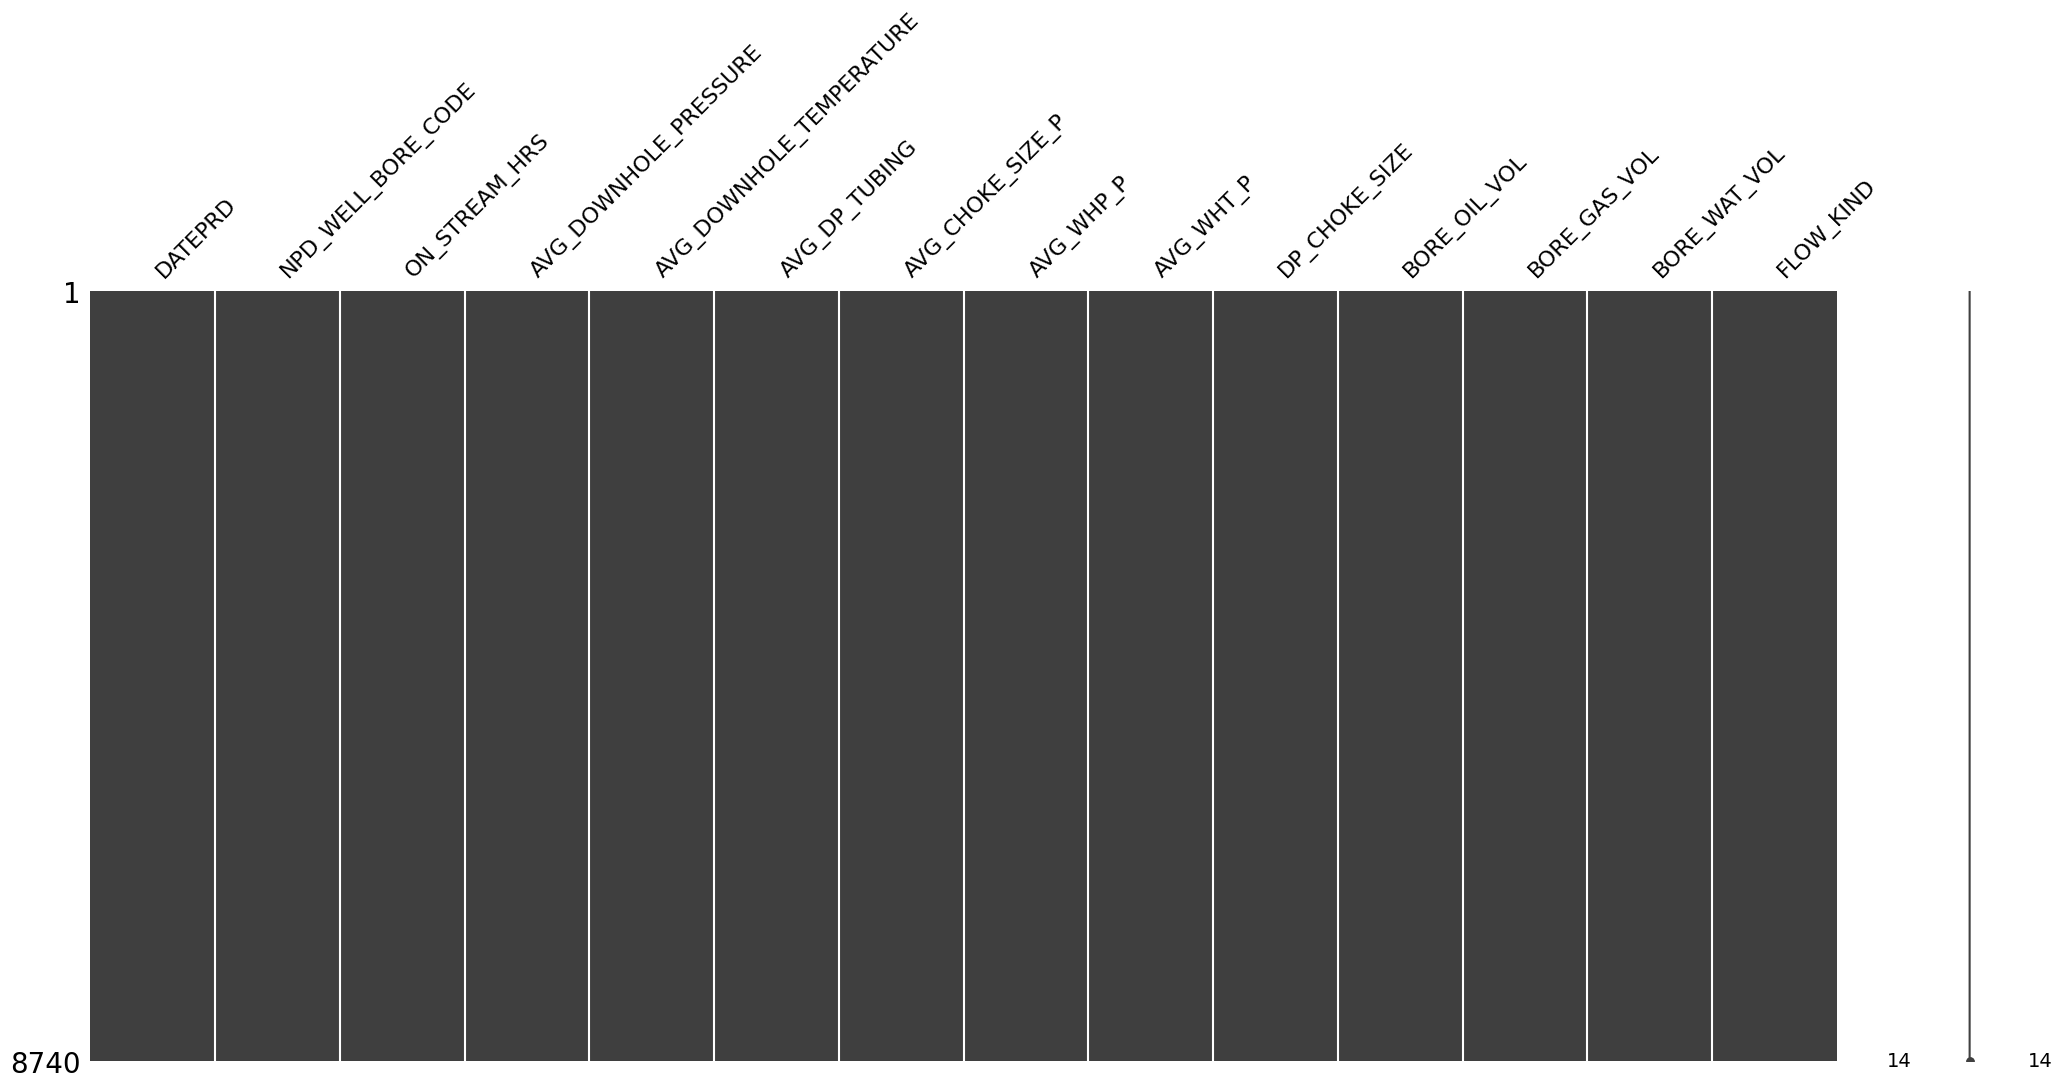

In [25]:
msno.matrix(df_prod)
plt.show()

In [26]:
df_prod['NPD_WELL_BORE_CODE'].value_counts()

NPD_WELL_BORE_CODE
5599    3006
5351    2854
7078    1159
7289     978
7405     743
Name: count, dtype: int64

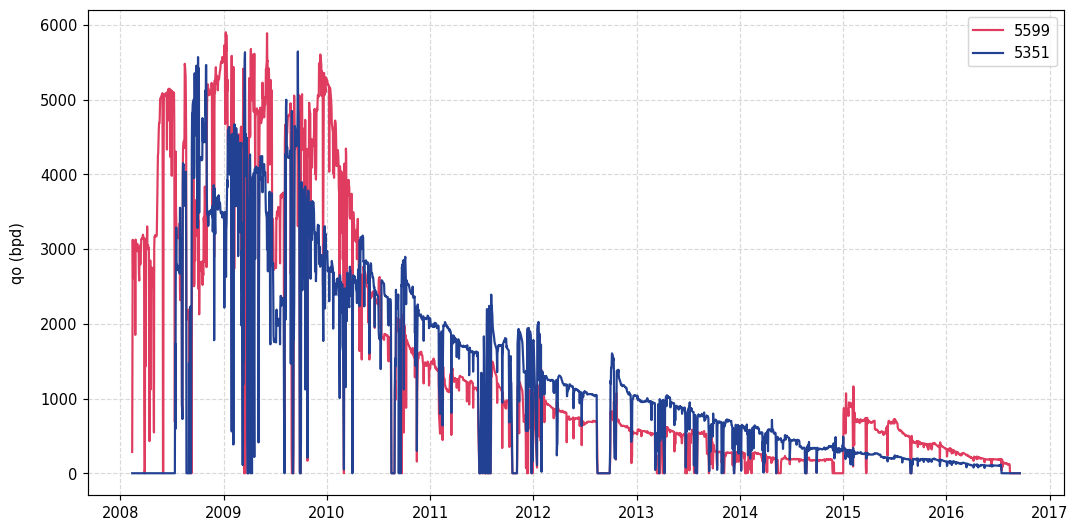

In [88]:
# Plotting the oil production rate
plt.figure(figsize=(12, 6), dpi=105)
plt.rc('axes', axisbelow=True)
# plt.rcParams['axes.axisbelow'] = True

# df_5599 = df_pd[df_pd['NPD_WELL_BORE_CODE'] == 5599]
# df_5351 = df_pd[df_pd['NPD_WELL_BORE_CODE'] == 5351]

df_5599 = df.filter(pl.col('NPD_WELL_BORE_CODE') == 5599)
df_5351 = df.filter(pl.col('NPD_WELL_BORE_CODE') == 5351)

plt.plot(df_5599['DATEPRD'], df_5599['BORE_OIL_VOL'], c='#DF3C5F', label='5599')
plt.plot(df_5351['DATEPRD'], df_5351['BORE_OIL_VOL'], c='#224193', label='5351')

plt.ylabel('qo (bpd)', labelpad=10)
plt.grid(c=(0.85, 0.85, 0.85), linestyle='dashed')
plt.legend()
plt.show()

In [89]:
df_prod['FLOW_KIND']

0       production
4       production
5       production
6       production
7       production
           ...    
8996    production
8997    production
8998    production
8999    production
9000    production
Name: FLOW_KIND, Length: 8740, dtype: object

In [90]:
# Renaming the column names 
df_cleaned = df_prod.rename(columns = {'DATEPRD':'Date', 'NPD_WELL_BORE_CODE':'Well', 'ON_STREAM_HRS':'st_hours',
                        'AVG_DOWNHOLE_PRESSURE':'Pwf', 'AVG_DOWNHOLE_TEMPERATURE':'Twf', 'AVG_DP_TUBING':'ΔP_tub', 
                        'AVG_CHOKE_SIZE_P':'Ø_size', 'AVG_WHP_P':'P_wh', 'AVG_WHT_P':'T_wh', 
                        'DP_CHOKE_SIZE':'ΔP_choke', 'BORE_OIL_VOL':'Qo', 'BORE_GAS_VOL':'Qg', 
                        'BORE_WAT_VOL':'Qw', 'FLOW_KIND':'Flow_Kind'})

In [93]:
# Displaying the 3 rows 
df_cleaned.head(3)

Date  Well  st_hours       Pwf      Twf    ΔP_tub  Ø_size     P_wh  \
0 2014-04-07  7405       0.0    0.0000   0.0000    0.0000   0.000   0.0000   
4 2014-04-11  7405       0.0  310.3761  96.8759  277.2783   1.216  33.0979   
5 2014-04-12  7405       0.0  303.5008  96.9234  281.4474   3.087  22.0533   

      T_wh  ΔP_choke   Qo   Qg   Qw   Flow_Kind  
0   0.0000    0.0000  0.0  0.0  0.0  production  
4  10.4799   33.0720  0.0  0.0  0.0  production  
5   8.7043   22.0533  0.0  0.0  0.0  production

In [92]:
# Saving the dataframe as a CSV file
df_cleaned.to_csv('df_cleaned.csv', index=False)

In [63]:
# Opening the dataframe
db = pd.read_csv('df_cleaned.csv')
db.head()

Date  Well  st_hours       Pwf      Twf    ΔP_tub  Ø_size     P_wh  \
0  2014-04-07  7405       0.0    0.0000   0.0000    0.0000  0.0000   0.0000   
1  2014-04-11  7405       0.0  310.3761  96.8759  277.2783  1.2160  33.0979   
2  2014-04-12  7405       0.0  303.5008  96.9234  281.4474  3.0870  22.0533   
3  2014-04-13  7405       0.0  303.5348  96.9588  276.0320  1.9624  27.5028   
4  2014-04-14  7405       0.0  303.7823  96.9687  282.7868  0.0000  20.9955   

      T_wh  ΔP_choke   Qo   Qg   Qw   Flow_Kind  
0   0.0000    0.0000  0.0  0.0  0.0  production  
1  10.4799   33.0720  0.0  0.0  0.0  production  
2   8.7043   22.0533  0.0  0.0  0.0  production  
3   9.4231   16.1633  0.0  0.0  0.0  production  
4   8.1314   20.7371  0.0  0.0  0.0  production